# 一起来打怪之 Credit Scoring 练习

-------
## >>>说明：
### 1. 答题步骤：
- 回答问题**请保留每一步**操作过程，请不要仅仅给出最后答案
- 请养成代码注释的好习惯

### 2. 解题思路：
- 为方便大家准确理解题目，在习题实战中有所收获，本文档提供了解题思路提示
- 解题思路**仅供参考**，鼓励原创解题方法
- 为督促同学们自己思考，解题思路内容设置为**注释**，请注意查看

### 3. 所用数据：
- 问题使用了多个数据库，请注意导入每个数据库后都先**查看和了解数据的基本性质**，后面的问题不再一一提醒

--------
## 操作题

### 信用卡欺诈项目

 #### 前期数据导入,预览及处理(此部分勿修改，涉及的数据文件无需复制移动)

In [1]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)
import zipfile
with zipfile.ZipFile('KaggleCredit2.csv.zip', 'r') as z:
    f = z.open('KaggleCredit2.csv')
    data = pd.read_csv(f, index_col=0)
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [2]:
# 检查数据维度
data.shape

(112915, 11)

In [3]:
# 了解数据集的统计信息
data.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,112915.000000,112915.000000,108648.000000,112915.000000,112915.000000,1.129150e+05,112915.000000,112915.000000,112915.000000,112915.000000,108648.000000
mean,0.067449,5.825057,51.361304,0.378807,0.306221,6.959809e+03,8.675561,0.213594,1.015587,0.188531,0.856574
std,0.250799,254.976948,14.453571,3.521621,0.222926,1.478193e+04,5.124575,3.489531,1.080925,3.472207,1.149537
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.034371,41.000000,0.000000,0.133458,3.637000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.173016,51.000000,0.000000,0.278272,5.600000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.570906,62.000000,0.000000,0.440113,8.416000e+03,11.000000,0.000000,2.000000,0.000000,2.000000
max,1.000000,50708.000000,103.000000,98.000000,0.999909,3.008750e+06,57.000000,98.000000,29.000000,98.000000,20.000000


In [4]:
# 查看数据缺失值情况
data.isnull().sum(axis=0)

SeriousDlqin2yrs                           0
RevolvingUtilizationOfUnsecuredLines       0
age                                     4267
NumberOfTime30-59DaysPastDueNotWorse       0
DebtRatio                                  0
MonthlyIncome                              0
NumberOfOpenCreditLinesAndLoans            0
NumberOfTimes90DaysLate                    0
NumberRealEstateLoansOrLines               0
NumberOfTime60-89DaysPastDueNotWorse       0
NumberOfDependents                      4267
dtype: int64

In [5]:
# 清除缺失值
data.dropna(inplace=True)

In [6]:
# 取出对应的X和y
y = data['SeriousDlqin2yrs']
X = data.drop('SeriousDlqin2yrs', axis=1)
# 查看平均的欺诈率
y.mean()

0.06742876076872101

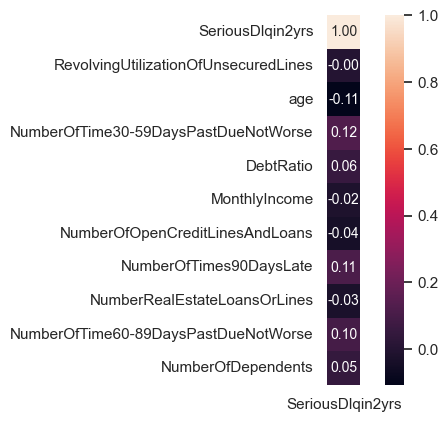

In [7]:
## 相关系数热力图

# 列名
column_names = data.columns.tolist() 

# 计算相关系数矩阵
corr_matrix = np.corrcoef(data.values.T)

# 获取第一列的相关系数
first_column_corr = corr_matrix[:, 0].reshape(-1, 1)  # 转换成2D数组以适应热力图函数的要求

# 绘制热力图
sns.set(font_scale=1)
sns.heatmap(first_column_corr,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=column_names,
                 xticklabels=[column_names[0]])  
plt.show()

<font color="#dd0000">与 “NumberOfTime30-59DaysPastDueNotWorse”, “age” 和 “NumberOfTimes9ODaysLate” 最为相关</font><br />

### 以下为操作题

#### 1.把数据切分成训练集和测试集

In [8]:
# 分割为训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=0)
    # test_size=0.3表示测试集的比例为30%的数据，剩余的70%则为训练集。
    # shuffle=True表示在分割前将数据进行随机打乱。
    # random_state=0设定了一个随机数种子，确保每次分割的结果都是一样的，这对于可重复性实验是很重要的。

# 查看数据的维度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((76053, 10), (32595, 10), (76053,), (32595,))

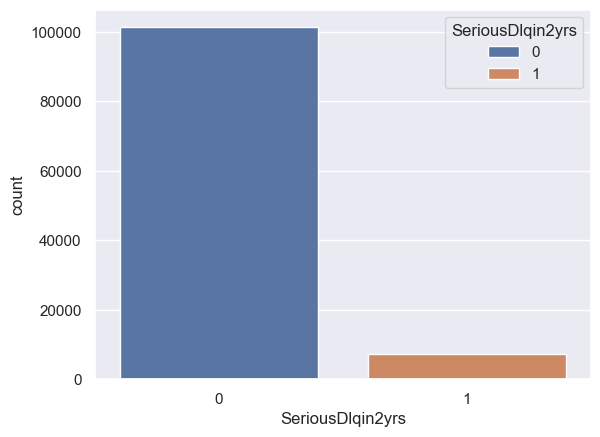

In [9]:
# 通过SeriousDlqin2yrs字段查看正负样本分布情况
# 提示：value_counts
y.value_counts()

# 绘制两种类别的柱状图
# 提示：dataframe可以直接plot(kind='bar') 不知道为啥跑不出来, 所以换成下面的方法
sns.countplot(x="SeriousDlqin2yrs", data=data, hue="SeriousDlqin2yrs") 

# 显示图形
plt.show()

#### 2.数据预处理之离散化

In [10]:
# 请对年龄按照3岁一个区间进行离散化
# 提示：可以先计算出分桶边界，再基于pandas的cut函数进行离散化(分箱、分桶)
X_new = data.drop('SeriousDlqin2yrs', axis=1)

# 确定年龄的最小和最大值来定义分箱的边界
age_min = int(X_new['age'].min())
age_max = int(X_new['age'].max())

# 创建分箱边界，每3岁一个区间
bins = list(range(age_min, age_max + 3, 3))

# 使用cut函数进行离散化
X_new['age'] = pd.cut(X_new['age'], bins)

X_new.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,"(42, 45]",2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0.957151,"(39, 42]",0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0.658180,"(36, 39]",1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0.233810,"(27, 30]",0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0.907239,"(48, 51]",1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


In [11]:
X.head()

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0.766127,45.0,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0
1,0.957151,40.0,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0
2,0.658180,38.0,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0
3,0.233810,30.0,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0
4,0.907239,49.0,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0


#### 3.数据预处理之独热向量编码

In [12]:
# 请对上述分箱后的年龄段进行独热向量编码
# 提示：使用pandas的get_dummies完成
X_new = pd.get_dummies(X_new,columns=['age'],prefix_sep='_',dummy_na=False,drop_first=False)

# 查看独热编码结果
X_new.head()

,RevolvingUtilizationOfUnsecuredLines,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,"age_(0, 3]","age_(3, 6]","age_(6, 9]","age_(9, 12]","age_(12, 15]","age_(15, 18]","age_(18, 21]","age_(21, 24]","age_(24, 27]","age_(27, 30]","age_(30, 33]","age_(33, 36]","age_(36, 39]","age_(39, 42]","age_(42, 45]","age_(45, 48]","age_(48, 51]","age_(51, 54]","age_(54, 57]","age_(57, 60]","age_(60, 63]","age_(63, 66]","age_(66, 69]","age_(69, 72]","age_(72, 75]","age_(75, 78]","age_(78, 81]","age_(81, 84]","age_(84, 87]","age_(87, 90]","age_(90, 93]","age_(93, 96]","age_(96, 99]","age_(99, 102]","age_(102, 105]"
0,0.766127,2.0,0.802982,9120.0,13.0,0.0,6.0,0.0,2.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0.957151,0.0,0.121876,2600.0,4.0,0.0,0.0,0.0,1.0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,0.658180,1.0,0.085113,3042.0,2.0,1.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,0.233810,0.0,0.036050,3300.0,5.0,0.0,0.0,0.0,0.0,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,0.907239,1.0,0.024926,63588.0,7.0,0.0,1.0,0.0,0.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
# 重新分割数据集
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.3, shuffle=True, random_state=0)
    # test_size=0.3表示测试集的比例为30%的数据，剩余的70%则为训练集。
    # shuffle=True表示在分割前将数据进行随机打乱。
    # random_state=0设定了一个随机数种子，确保每次分割的结果都是一样的，这对于可重复性实验是很重要的。

# 查看数据的维度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((76053, 44), (32595, 44), (76053,), (32595,))

#### 4.数据预处理之幅度缩放

In [14]:
# 请对连续值特征进行幅度缩放
# 提示：可以使用StandardScaler等幅度缩放器进行处理
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()  # 对数据的每一列做了一个归一化
sc.fit(X_train)

StandardScaler()

In [15]:
# Check
print(sc.mean_, sc.scale_)

np.mean(X_train, axis=0), np.std(X_train, axis=0)

[6.24891681e+00 3.82141401e-01 3.05889733e-01 6.96329249e+03
 8.67997318e+00 2.15875771e-01 1.01193904e+00 1.91761009e-01
 8.57415224e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.03874929e-03
 1.20179349e-02 2.37071516e-02 3.77894363e-02 4.66779746e-02
 4.88212168e-02 5.81042168e-02 6.44419024e-02 7.13186857e-02
 7.83269562e-02 7.78010072e-02 7.37249024e-02 6.80972480e-02
 6.46391332e-02 6.85443046e-02 5.06883358e-02 4.07610482e-02
 3.10572890e-02 2.55085269e-02 1.95258570e-02 1.55680907e-02
 9.15151276e-03 6.52176771e-03 3.99721247e-03 1.56469830e-03
 3.81313032e-04 1.70933428e-04 2.62974505e-05 1.31487252e-05] [2.73361312e+02 3.57454381e+00 2.22787954e-01 1.58054741e+04
 5.12814227e+00 3.54201626e+00 1.07201391e+00 3.52622942e+00
 1.15264795e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
 1.00000000e+00 1.00000000e+00 1.00000000e+00 3.22128902e-02
 1.08965610e-01 1.52135211e-01 1.90686640e-01 2.10948196e-01
 2.15494096e-01 2.33940

(RevolvingUtilizationOfUnsecuredLines       6.248917
 NumberOfTime30-59DaysPastDueNotWorse       0.382141
 DebtRatio                                  0.305890
 MonthlyIncome                           6963.292493
 NumberOfOpenCreditLinesAndLoans            8.679973
 NumberOfTimes90DaysLate                    0.215876
 NumberRealEstateLoansOrLines               1.011939
 NumberOfTime60-89DaysPastDueNotWorse       0.191761
 NumberOfDependents                         0.857415
 age_(0, 3]                                 0.000000
 age_(3, 6]                                 0.000000
 age_(6, 9]                                 0.000000
 age_(9, 12]                                0.000000
 age_(12, 15]                               0.000000
 age_(15, 18]                               0.000000
 age_(18, 21]                               0.001039
 age_(21, 24]                               0.012018
 age_(24, 27]                               0.023707
 age_(27, 30]                               0.

In [16]:
# 标准化
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

#### 5.使用logistic regression建模，并且输出一下系数，分析重要度。   

In [18]:
# 提示：fit建模，建完模之后可以取出coef属性
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression(max_iter=200)
model_LR.fit(X_train_std, y_train)

LogisticRegression(max_iter=200)

In [19]:
## 计算准确度

# 先导入 accuracy_score
from sklearn.metrics import accuracy_score

# 计算预测值
pred_LR = model_LR.predict(X_test_std)

# 计算准确度
acc_LR = accuracy_score(y_test, pred_LR)
print(f"Model accuracy: {acc_LR*100:.2f}%")

Model accuracy: 93.38%


In [20]:
## 输出系数

# 斜率
print('Slope: ' + str(model_LR.coef_[0])[1:len(str(model_LR.coef_[0])) - 1])
# 截距
print('Intercept: %.3f' % model_LR.intercept_[0])

Slope: -0.01429447  1.70848312  0.31122889 -0.1264953  -0.09481751  1.65540679
 -0.19568597 -3.19008058  0.11070885  0.          0.          0.
  0.          0.          0.         -0.03314765  0.065687    0.10838945
  0.12849646  0.09425669  0.09569643  0.04557374  0.077612    0.04046438
  0.04924385  0.03818208  0.03402939 -0.01963081 -0.02787191 -0.07587063
 -0.11040238 -0.15657037 -0.07904447 -0.10685543 -0.1043886  -0.1029279
 -0.04696582 -0.05259977 -0.0103805  -0.01122957 -0.20967344  0.00886548
 -0.05323264 -0.03774556
Intercept: -2.872


#### 6.使用网格搜索交叉验证进行调参
调整penalty和C参数，其中penalty候选为"l1"和"l2"，C的候选为[1,10,100,500]

In [21]:
## 提示：先按照上面要求准备好网格字典，再使用GridSearchCV进行调参

# 导入 GridSearchCV
from sklearn.model_selection import GridSearchCV

# 准备参数网格
param_grid = {
    'penalty': ['l1', 'l2'],  # 正则化参数
    'C': [1, 10, 100, 500],   # 正则化强度的倒数
    'solver': ['liblinear'] # 求解器 , 'saga'
}

# 初始化GridSearchCV对象：
grid_search = GridSearchCV(model_LR, param_grid, cv=5)  # cv是交叉验证的折数

# 进行拟合和调参
grid_search.fit(X_train_std, y_train)  # 使用训练数据进行拟合

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=200),
             param_grid={'C': [1, 10, 100, 500], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']})

In [22]:
# 输出最好的超参数
# 输出最好的模型

model_LR = grid_search.best_estimator_
model_LR.fit(X_train_std, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
print('Beet estimator:', grid_search.best_estimator_)

Best parameters: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.9331913221905788
Beet estimator: LogisticRegression(C=1, max_iter=200, penalty='l1', solver='liblinear')


#### 7.在测试集上进行预测，计算 查准率/查全率/auc/混淆矩阵/f1值 等测试指标

In [23]:
# 提示：在测试集上预测可以使用predict
# 提示：各种指标可以在sklearn.metrics中查到各种评估指标，分别是accuracy_score、recall_score、auc、confusion_matrix、f1_score
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix, f1_score

# 计算预测值
y_pred = model_LR.predict(X_test_std)
y_pred_proba = model_LR.predict_proba(X_test_std)[:, 1]  # 获取属于正类的概率，用于AUC计算


# 定义一个计算测试指标的函数
def evaluate_model(model, y_pred, y_pred_proba):  
    # 计算测试指标
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    cm = confusion_matrix(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # 创建一个字典，包含所有的测试指标
    metrics_dict = {
        "Accuracy": [accuracy],
        "Recall": [recall],
        "AUC": [auc],
        "F1 Score": [f1]
    }
    
    # 创建一个DataFrame来显示测试指标
    metrics_df = pd.DataFrame(metrics_dict)
    
    # 将混淆矩阵转换为DataFrame格式，方便展示
    conf_matrix_df = pd.DataFrame(cm)
    
    return metrics_df, conf_matrix_df

# 应用于 model_LR
evaluates, conf_matrix = evaluate_model(model_LR, y_pred, y_pred_proba)
print(evaluates)
print("\nConfusion matrix:\n" , conf_matrix)

   Accuracy    Recall       AUC  F1 Score
0  0.933794  0.039152  0.697809  0.073024

Confusion matrix:
        0   1
0  30352  72
1   2086  85


#### 8.更多优化
银行通常会有更严格的要求，因为欺诈带来的后果通常比较严重，一般我们会调整模型的标准。   

比如在logistic regression当中，一般我们的概率判定边界为0.5，但是我们可以把阈值设定低一些，来提高模型的“敏感度”   
试试看把阈值设定为0.3，再看看这个时候的混淆矩阵等评估指标。

In [24]:
# 提示：thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# 根据predict_proba的结果和threshold的比较确定结果，再评估各种结果指标

# 设置阈值
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

# 存储结果
evaluates_new = pd.DataFrame()

# 循环获取预测值
for threshold in thresholds:
    # 获取预测概率
    pred_pro = model_LR.predict_proba(X_test_std)[:, 1]
    # 应用阈值来获取新的预测值
    new_pred = np.where(pred_pro > threshold, 1, 0)
    evaluates, conf_matrix = evaluate_model(model_LR, new_pred, pred_pro)
    # 添加阈值信息
    evaluates.insert(0, 'Threshold', threshold)
    # 将结果添加到总的DataFrame中
    evaluates_new = pd.concat([evaluates_new, evaluates], ignore_index=True)
    
evaluates_new

,Threshold,Accuracy,Recall,AUC,F1 Score
0,0.1,0.849363,0.419622,0.697809,0.270648
1,0.2,0.927596,0.184247,0.697809,0.253165
2,0.3,0.933364,0.104560,0.697809,0.172887
3,0.4,0.934008,0.064026,0.697809,0.114450
4,0.5,0.933794,0.039152,0.697809,0.073024
5,0.6,0.933701,0.024873,0.697809,0.047598
6,0.7,0.933548,0.017043,0.697809,0.033036
7,0.8,0.933487,0.011055,0.697809,0.021661
8,0.9,0.933303,0.001382,0.697809,0.002752


<font color="#dd0000">把阈值设定为0.2似乎最为合适</font><br />

#### 9.尝试对不同特征的重要度进行排序，通过特征选择的方式，对特征进行筛选。并重新建模，观察此时的模型准确率等评估指标。

In [25]:
# 可以根据逻辑回归的系数绝对值大小进行排序，也可以基于树模型的特征重要度进行排序
# 特征选择可以使用RFE或者selectFromModel


In [26]:
## 根据逻辑回归的系数绝对值大小进行排序

# 获取系数并创建一个系数DataFrame
coefficients = model_LR.coef_.ravel()  # 将系数数组拉平
feature_names = X_train.columns

coef_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients, 'Absolute Coefficient': abs(coefficients)})

# 根据绝对值大小排序
sorted_coef_df = coef_df.sort_values(by='Absolute Coefficient', ascending=False)

sorted_coef_df.head(6) # 选择6个特征

,Feature,Coefficient,Absolute Coefficient
7,NumberOfTime60-89DaysPastDueNotWorse,-3.212096,3.212096
1,NumberOfTime30-59DaysPastDueNotWorse,1.715588,1.715588
5,NumberOfTimes90DaysLate,1.670371,1.670371
2,DebtRatio,0.311181,0.311181
6,NumberRealEstateLoansOrLines,-0.195401,0.195401
31,"age_(66, 69]",-0.181677,0.181677


In [27]:
# 使用RFE进行特征选择
from sklearn.feature_selection import RFE

# 初始化RFE对象，并指定要选择的特征数
model_LR_RFE = RFE(estimator=model_LR, n_features_to_select=6)  # 选择6个特征

# 在数据上训练RFE并进行特征选择
model_LR_RFE.fit(X_train_std, y_train)

# 查看选择的特征
selected_features = pd.DataFrame(X_train_std, columns=feature_names).columns[model_LR_RFE.support_]
print("Selected features using RFE:", selected_features)

Selected features using RFE: Index(['NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio',
       'NumberOfTimes90DaysLate', 'NumberRealEstateLoansOrLines',
       'NumberOfTime60-89DaysPastDueNotWorse', 'age_(66, 69]'],
      dtype='object')


In [28]:
# 计算预测值
y_pred_proba = model_LR_RFE.predict_proba(X_test_std)[:, 1]  # 获取属于正类的概率，用于AUC计算
y_pred = np.where(y_pred_proba > 0.2, 1, 0)

# 应用于 model_LR
evaluates, conf_matrix = evaluate_model(model_LR_RFE, y_pred, y_pred_proba)
print(evaluates)
print("\nConfusion matrix:\n" , conf_matrix)

   Accuracy    Recall       AUC  F1 Score
0  0.929222  0.160295  0.673363  0.231768

Confusion matrix:
        0    1
0  29940  484
1   1823  348


<font color="#dd0000">在阈值为 0.2 的情况下, 选取 6 个最重要的特征后, 结果变差了</font><br />

#### 10.其他模型算法尝试
使用RandomForestClassifier/SVM/KNN等sklearn分类算法进行分类，尝试上述超参数调优算法过程。

##### 随机森林

In [27]:
# 随机森林
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_std, y_train)

# 准备参数网格
param_grid = {
    'n_estimators': [10, 50, 100, 200],  # 树的数量
    'max_depth': [None, 10, 20, 30],  # 树的最大深度
    'min_samples_split': [2, 4, 6],  # 分裂内部节点所需的最小样本数
    'random_state': [42]
}

# 初始化GridSearchCV对象
grid_search = GridSearchCV(model, param_grid, cv=5)

# 进行拟合和调参
grid_search.fit(X_train_std, y_train)  # 使用训练数据进行拟合

# 输出最好的超参数
# 输出最好的模型
model_new = grid_search.best_estimator_
model_new.fit(X_train_std, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
print('Beet estimator:', model_new)

Best parameters: {'max_depth': 30, 'min_samples_split': 6, 'n_estimators': 200, 'random_state': 42}
Best score: 0.9349927037731917
Beet estimator: RandomForestClassifier(max_depth=30, min_samples_split=6, n_estimators=200,
                       random_state=42)


In [32]:
# 提示：thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# 根据predict_proba的结果和threshold的比较确定结果，再评估各种结果指标

# 设置阈值
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

# 存储结果
evaluates_new = pd.DataFrame()

# 循环获取预测值
for threshold in thresholds:
    # 获取预测概率
    pred_pro = model_new.predict_proba(X_test_std)[:, 1]
    # 应用阈值来获取新的预测值
    new_pred = np.where(pred_pro > threshold, 1, 0)
    evaluates, conf_matrix = evaluate_model(model_new, new_pred, pred_pro)
    # 添加阈值信息
    evaluates.insert(0, 'Threshold', threshold)
    # 将结果添加到总的DataFrame中
    evaluates_new = pd.concat([evaluates_new, evaluates], ignore_index=True)
    
evaluates_new

,Threshold,Accuracy,Recall,AUC,F1 Score
0,0.1,0.830864,0.687241,0.843226,0.351183
1,0.2,0.902378,0.528328,0.843226,0.418919
2,0.3,0.925817,0.391064,0.843226,0.412536
3,0.4,0.934376,0.259327,0.843226,0.344870
4,0.5,0.936340,0.142331,0.843226,0.229484
5,0.6,0.935082,0.053432,0.843226,0.098807
6,0.7,0.933916,0.012437,0.843226,0.024457
7,0.8,0.933517,0.002303,0.843226,0.004593
8,0.9,0.933395,0.000000,0.843226,0.000000


In [52]:
## 基于树模型的特征重要度进行排序
from sklearn.ensemble import RandomForestClassifier
model_new = RandomForestClassifier(max_depth=30, min_samples_split=6, n_estimators=200, random_state=42)
model_new.fit(X_train_std, y_train)

# 获取特征重要性
importances = model_new.feature_importances_

# 将特征名与重要性对应起来
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# 根据重要性排序
sorted_importance_df = importance_df.sort_values(by='Importance', ascending=False)

sorted_importance_df.head()

,Feature,Importance
0,RevolvingUtilizationOfUnsecuredLines,0.190097
2,DebtRatio,0.145859
3,MonthlyIncome,0.139610
5,NumberOfTimes90DaysLate,0.115345
4,NumberOfOpenCreditLinesAndLoans,0.086122


In [53]:
# 初始化SelectFromModel对象
from sklearn.feature_selection import SelectFromModel
model_SFM = SelectFromModel(estimator=model_new)

# 在数据上训练SelectFromModel并进行特征选择
model_SFM.fit(X_train_std, y_train)

# 获取所选特征
selected_features = X_train.columns[model_SFM.get_support()]
print("Selected features using SelectFromModel:", selected_features)

Selected features using SelectFromModel: Index(['RevolvingUtilizationOfUnsecuredLines',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')


In [55]:
# 获取所选特征的布尔掩码
selected_features_mask = model_SFM.get_support()

# 使用所选特征训练模型
model_new.fit(X_train_std[:, selected_features_mask], y_train)

# 计算预测值 
y_pred_proba = model_new.predict_proba(X_test_std[:, selected_features_mask])[:, 1]  # 获取属于正类的概率，用于AUC计算
y_pred = np.where(y_pred_proba > 0.2, 1, 0)

# 计算测试指标
evaluates, conf_matrix = evaluate_model(model_new, y_pred, y_pred_proba)
print(evaluates)
print("\nConfusion matrix:\n" , conf_matrix)

   Accuracy    Recall       AUC  F1 Score
0  0.899678  0.521879  0.831848  0.409321

Confusion matrix:
        0     1
0  28192  2232
1   1038  1133


In [34]:
# 使用RFE进行特征选择
from sklearn.feature_selection import RFE

# 初始化RFE对象，并指定要选择的特征数
model_RFE = RFE(estimator=model_new, n_features_to_select=6)  # 选择6个特征

# 在数据上训练RFE并进行特征选择
model_RFE.fit(X_train_std, y_train)

# 查看选择的特征
selected_features = pd.DataFrame(X_train_std, columns=feature_names).columns[model_RFE.support_]
print("Selected features using RFE:", selected_features)

# 计算预测值
y_pred_proba = model_RFE.predict_proba(X_test_std)[:, 1]  # 获取属于正类的概率，用于AUC计算
y_pred = np.where(y_pred_proba > 0.2, 1, 0)

# 应用于 model_RFE
evaluates, conf_matrix = evaluate_model(model_RFE, y_pred, y_pred_proba)
print(evaluates)
print("\nConfusion matrix:\n" , conf_matrix)

Selected features using RFE: Index(['RevolvingUtilizationOfUnsecuredLines',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate'],
      dtype='object')
   Accuracy   Recall       AUC  F1 Score
0  0.897714  0.48503  0.813433  0.387132

Confusion matrix:
        0     1
0  28208  2216
1   1118  1053


<font color="#dd0000"> 对于随机森林, 最佳参数选择为 RandomForestClassifier(max_depth=30, min_samples_split=6, n_estimators=200, random_state=42) </font><br />
<font color="#dd0000"> 阈值选择最佳为 0.2, 且选择SelectFromModel中九个特征后结果变差, 而选择RFE前六个最重要的特征后, 结果更差 </font><br />

##### 支持向量机

In [ ]:
# %%time
# # 支持向量机
# from sklearn.svm import SVC

# # 初始化SVC模型
# model = SVC(probability=True, kernel='linear')

# # 准备参数网格
# param_grid = {
#     'C': [1, 10]
#     # 'C': [1, 10, 100, 500],  # 正则化参数
#     # 'kernel': ['linear', 'rbf', 'poly'],  # 核函数 
#     # 'gamma': ['scale', 'auto']  # 核系数
# }

# # 初始化GridSearchCV对象
# grid_search = GridSearchCV(model, param_grid, cv=5)

# # 进行拟合和调参
# grid_search.fit(X_train_std, y_train)

# # 输出最好的超参数
# # 输出最好的模型
# model_new = grid_search.best_estimator_
# model_new.fit(X_train_std, y_train)

# print("Best parameters:", grid_search.best_params_)
# print("Best score:", grid_search.best_score_)
# print('Beet estimator:', model_new)

In [ ]:
# 上面的网络搜索交叉验证没跑出来

# 支持向量机
from sklearn.svm import SVC

# 初始化SVC模型
model_new = SVC(probability=True, kernel='linear', C=1)
model_new.fit(X_train_std, y_train)

SVC(C=1, kernel='linear', probability=True)

In [ ]:
# 提示：thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# 根据predict_proba的结果和threshold的比较确定结果，再评估各种结果指标

# 设置阈值
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

# 存储结果
evaluates_new = pd.DataFrame()

# 循环获取预测值
for threshold in thresholds:
    # 获取预测概率
    pred_pro = model_new.predict_proba(X_test_std)[:, 1]
    # 应用阈值来获取新的预测值
    new_pred = np.where(pred_pro > threshold, 1, 0)
    evaluates, conf_matrix = evaluate_model(model_new, new_pred, pred_pro)
    # 添加阈值信息
    evaluates.insert(0, 'Threshold', threshold)
    # 将结果添加到总的DataFrame中
    evaluates_new = pd.concat([evaluates_new, evaluates], ignore_index=True)
    
evaluates_new

,Threshold,Accuracy,Recall,AUC,F1 Score
0,0.1,0.933364,0.010134,0.718016,0.019856
1,0.2,0.933456,0.009212,0.718016,0.018108
2,0.3,0.933456,0.009212,0.718016,0.018108
3,0.4,0.933456,0.009212,0.718016,0.018108
4,0.5,0.933456,0.009212,0.718016,0.018108
5,0.6,0.933456,0.009212,0.718016,0.018108
6,0.7,0.933456,0.009212,0.718016,0.018108
7,0.8,0.933456,0.009212,0.718016,0.018108
8,0.9,0.933395,0.000000,0.718016,0.000000


In [ ]:
# 使用RFE进行特征选择
from sklearn.feature_selection import RFE

# 初始化RFE对象，并指定要选择的特征数
model_RFE = RFE(estimator=model_new, n_features_to_select=6)  # 选择6个特征

# 在数据上训练RFE并进行特征选择
model_RFE.fit(X_train_std, y_train)

# 查看选择的特征
selected_features = pd.DataFrame(X_train_std, columns=feature_names).columns[model_RFE.support_]
print("Selected features using RFE:", selected_features)

# 计算预测值
y_pred_proba = model_RFE.predict_proba(X_test_std)[:, 1]  # 获取属于正类的概率，用于AUC计算
y_pred = np.where(y_pred_proba > 0.2, 1, 0)

# 应用于 model_RFE
evaluates, conf_matrix = evaluate_model(model_RFE, y_pred, y_pred_proba)
print(evaluates)
print("\nConfusion matrix:\n" , conf_matrix)

<font color="#dd0000">网络搜索交叉验证和 RFE 没跑出来...</font><br />
<font color="#dd0000">阈值对结果影响很小</font><br />

##### K最近邻

In [28]:
# K最近邻
from sklearn.neighbors import KNeighborsClassifier

# 初始化KNN模型
model = KNeighborsClassifier()

# 准备参数网格
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],  # 邻居数
    'metric': ['euclidean', 'manhattan'],  # 距离度量
    'weights': ['uniform', 'distance']  # 权重函数
}

# 初始化GridSearchCV对象
grid_search = GridSearchCV(model, param_grid, cv=5)

# 进行拟合和调参
grid_search.fit(X_train_std, y_train)

# 输出最好的超参数
# 输出最好的模型
model_new = grid_search.best_estimator_
model_new.fit(X_train_std, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)
print('Beet estimator:', model_new)

Best parameters: {'metric': 'euclidean', 'n_neighbors': 9, 'weights': 'uniform'}
Best score: 0.932783712918231
Beet estimator: KNeighborsClassifier(metric='euclidean', n_neighbors=9)


In [30]:
# 提示：thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
# 根据predict_proba的结果和threshold的比较确定结果，再评估各种结果指标

# 设置阈值
thresholds = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

# 存储结果
evaluates_new = pd.DataFrame()

# 循环获取预测值
for threshold in thresholds:
    # 获取预测概率
    pred_pro = model_new.predict_proba(X_test_std)[:, 1]
    # 应用阈值来获取新的预测值
    new_pred = np.where(pred_pro > threshold, 1, 0)
    evaluates, conf_matrix = evaluate_model(model_new, new_pred, pred_pro)
    # 添加阈值信息
    evaluates.insert(0, 'Threshold', threshold)
    # 将结果添加到总的DataFrame中
    evaluates_new = pd.concat([evaluates_new, evaluates], ignore_index=True)
    
evaluates_new

,Threshold,Accuracy,Recall,AUC,F1 Score
0,0.1,0.711796,0.596499,0.684252,0.216121
1,0.2,0.887774,0.315062,0.684252,0.272185
2,0.3,0.925234,0.173192,0.684252,0.235811
3,0.4,0.932260,0.088899,0.684252,0.148805
4,0.5,0.933395,0.045601,0.684252,0.083580
5,0.6,0.933487,0.017503,0.684252,0.033868
6,0.7,0.933425,0.006449,0.684252,0.012739
7,0.8,0.933425,0.000461,0.684252,0.000921
8,0.9,0.933395,0.000000,0.684252,0.000000


In [44]:
## 使用 Sequential Feature Selector 进行特征选择

# 初始化Sequential Feature Selector
from sklearn.feature_selection import SequentialFeatureSelector
model_SFS = SequentialFeatureSelector(model_new, n_features_to_select=6, direction='forward') # 选择 6 个

# 训练进行特征选择
model_SFS.fit(X_train_std, y_train)

SequentialFeatureSelector(estimator=KNeighborsClassifier(metric='euclidean',
                                                         n_neighbors=9),
                          n_features_to_select=6)

In [51]:
# 查看选择的特征
selected_features = pd.DataFrame(X_train_std, columns=feature_names).columns[model_SFS.support_]
print("Selected features using RFE:", selected_features)

# 获取所选特征的布尔掩码
selected_features_mask = model_SFS.get_support()

# 使用所选特征训练KNN模型
model_new.fit(X_train_std[:, selected_features_mask], y_train)

# 计算预测值 
y_pred_proba = model_new.predict_proba(X_test_std[:, selected_features_mask])[:, 1]  # 获取属于正类的概率，用于AUC计算
y_pred = np.where(y_pred_proba > 0.2, 1, 0)

# 计算测试指标
evaluates, conf_matrix = evaluate_model(model_new, y_pred, y_pred_proba)
print(evaluates)
print("\nConfusion matrix:\n" , conf_matrix)

Selected features using RFE: Index(['NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'age_(0, 3]', 'age_(3, 6]', 'age_(6, 9]', 'age_(42, 45]'],
      dtype='object')
   Accuracy    Recall       AUC  F1 Score
0  0.890996  0.294795  0.624106  0.264846

Confusion matrix:
        0     1
0  28402  2022
1   1531   640


<font color="#dd0000"> 对于K最近邻, 最佳参数选择为 KNeighborsClassifier(metric='euclidean', n_neighbors=9) </font><br />
<font color="#dd0000"> 阈值选择最佳为 0.2, 使用Sequential Feature Selector 选择 6 个特征后结果略差 </font><br />